# 00 - Imports and Functions

In [15]:
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style = 'white', rc=custom_params)
sns.color_palette('dark', as_cmap=True)

def experiment(n, p, x):
  #  'n' times
  #  'p' probability
  #  'x' coins
  heads_num = np.random.binomial(n, p, x)
  heads_frac = heads_num/n
  return heads_frac


def line(p1, p2):
  x1, y1 = p1
  x2, y2 = p2
  a = (y2-y1)/(x2-x1)
  b = y1 - a*x1
  return a, b


def target_function(a, b, x):
  f = a*x[:,1] + b
  y_val = x[:,2] - f
  y_sign = np.sign(y_val)
  return np.reshape(y_sign, (-1, 1))


def linear_regression(x, y):
  pseudo_inverse = np.linalg.inv(np.transpose(x)@x) @ np.transpose(x)
  w = pseudo_inverse@y
  return w


def linear_regression_error(x, y):
  h = np.sign(
      np.array(
          [np.dot(np.transpose(w), x[point,:]) for point in range(0, np.size(x,0))]
          ))
  E_in = (1/len(y))*np.sum(np.power(h - y, 2))
  return E_in


def hypothesis(w, x):
  h = np.sign(
      np.array(
          [np.dot(np.transpose(w), x[point,:]) for point in range(0, np.size(x,0))]
          ))
  return h


def perceptron_w0(x, y, w0):
  w = w0
  iter = 0
  h = hypothesis(w, x)

  while any(h != y):
    comp = h != y
    miss_points, _ = np.where(comp)  # Missclassified points
    index = np.random.randint(0, len(miss_points))  # Pick a point at random
    w += np.reshape(y[miss_points[index]]*x[miss_points[index],:], (-1, 1))
    h = hypothesis(w, x)
    iter += 1

  return w, iter


def target_function_nt(x):
  val = x[:,1]**2 + x[:,2]**2 - 0.6
  f = np.sign(val)
  return np.reshape(f, (-1, 1))


def nonlinear_transform(x):
  x0 = np.reshape(np.ones(np.size(x,0)), (-1,1))
  x1 = np.reshape(x[:, 1], (-1,1))
  x2 = np.reshape(x[:, 2], (-1,1))
  x3 = np.reshape(x1*x2, (-1,1))
  x4 = np.reshape(x1**2, (-1,1))
  x5 = np.reshape(x2**2, (-1,1))
  transform = np.concatenate((x0, x1, x2, x3, x4, x5), axis=1)
  return transform


def nonlinear_boundary(w, x): # x=xplot
  w = w/w[5]
  A = w[3]*x + w[2] 
  t = w[4]*(x**2) + w[1]*x + w[0]
  bound_up = np.sqrt(A/4 - t) - A/2
  bound_down = -np.sqrt(A/4 - t) - A/2
  return bound_up, bound_down



# (1)(2) Hoeffding Inequality

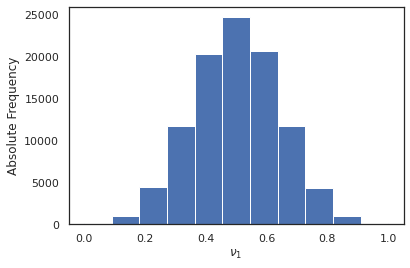

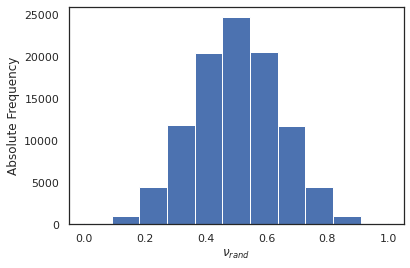

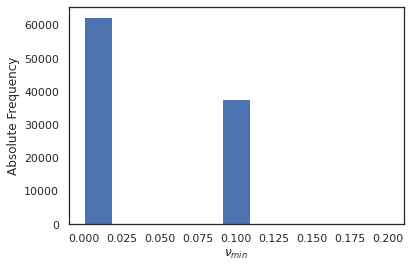

In [3]:
nu_1 = []
nu_rand = []
nu_min = []

for _ in range(0, int(1e5)):
  nu = experiment(10,  0.5, 1000)
  nu_1.append(nu[0])
  nu_rand.append(nu[random.randint(0,len(nu)-1)])
  nu_min.append(min(nu))

plt.figure()
plt.hist(nu_1, bins = 11)
plt.xlabel(r'$\nu_1$')
plt.ylabel('Absolute Frequency')
plt.figure()
plt.hist(nu_rand, bins=11)
plt.xlabel(r'$\nu_{rand}$')
plt.ylabel('Absolute Frequency')
plt.figure()
plt.hist(nu_min, bins=11)
plt.xlabel(r'$\nu_{min}$')
plt.ylabel('Absolute Frequency')

plt.show()


# (5)(6) Linear Regression

(5) Average In-Sample Error ( 1000 runs ): 0.13216000000000003
(6) Average Out-of-Sample Error: 0.052479000000000005


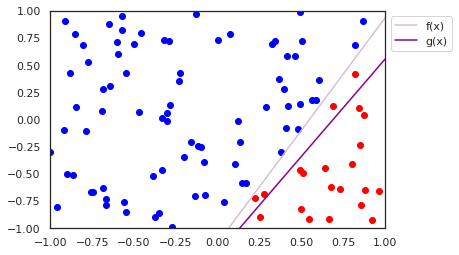

In [5]:
#----------> Target Function
p1 = np.random.uniform(-1,1,2)
p2 = np.random.uniform(-1,1,2)
a, b = line(p1, p2)  # target function coefficients

#----------> Training Set and Regression
N = 100   # data points
d = 2   # dimensions
k = 1000 # runs
errors = []
weights = []
x0 = np.ones((N,1))

#--> Loop (5)
for _ in range(0, k):
  x1n = np.random.uniform(low = -1, high = 1, size = (N,d))
  x = np.concatenate((x0, x1n), axis = 1)
  y = target_function(a, b, x)
  w = linear_regression(x, y)
  errors.append(linear_regression_error(x, y))
  weights.append(w)

#-> Loop (6)
N_out = 1000
x0_out = np.ones((N_out, 1))
x1n_out = np.random.uniform(-1, 1, (N_out, d))
x_out = np.concatenate((x0_out, x1n_out), 1)
y_out = target_function(a, b, x_out)
E_out = []
for j in range(0, np.size(weights,0)):
  g = hypothesis(weights[j], x_out)
  compare = g*y_out # [1] -> g(x)=f(x); [-1] -> g(x)≠f(x)
  miss = np.count_nonzero(compare == -1)
  E_out.append(miss/N_out)

points = np.concatenate((x, y), axis = 1)
#print('Weights: ', w)
print('(5) Average In-Sample Error (', k, 'runs', '):', np.average(errors))
print('(6) Average Out-of-Sample Error:', np.average(E_out))

#----------> Plots
plt.figure()
xplot = np.linspace(-1, 1, 100)
fplot = a*xplot + b
plt.plot(xplot, fplot, color='thistle', label='f(x)')

g1 = np.linspace(-1, 1, 100)
g2 = -w[0]/w[2] - (w[1]/w[2])*g1
plt.plot(g1, g2, color = 'darkmagenta', label='g(x)')

for ind in range(0, np.size(x,0)):
  if points[ind,-1] == 1.0:
    plt.scatter(points[ind,1], points[ind,2], color='blue')
  else:
    plt.scatter(points[ind,1], points[ind,2], color='red')
 
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# (7) Linear Regression (Into Perceptron)

In [6]:
#---------->
N_p = 10
iter = []
k_p = 10000

for _ in range(0, k_p):
  x0_p = np.ones((N_p, 1))
  x1n_p = np.random.uniform(-1, 1, (N_p, d))
  x_p = np.concatenate((x0_p, x1n_p), 1)
  y_p = target_function(a, b, x_p)
  w_0 = linear_regression(x_p, y_p)
  w_p, iter_num = perceptron_w0(x_p, y_p, w_0)
  iter.append(iter_num)

print('(7) Average No. of Iterations (PLA):', np.average(iter))

(7) Average No. of Iterations (PLA): 4.029


# (8)(9)(10) Nonlinear Transformation

In [10]:
#----------> 
N_lr = 1000
N_nt = 1000
x0_lr = np.ones((N_lr, 1))
x0_nt = np.ones((N_nt, 1))
E_in_lr = []
E_in_nt = []
weights_nt = np.zeros((6,))
runs = 1000

for _ in range(0, runs):

  #-> No. 8
  x1n_lr = np.random.uniform(-1, 1, (N_lr, d))
  x_lr = np.concatenate((x0_lr, x1n_lr), 1)
  y_lr = target_function_nt(x_lr)
  switch = np.concatenate((-1*np.ones((int(0.10*N_lr),1)), np.ones((int(0.90*N_lr),1))))
  np.random.shuffle(switch)
  y_lr = y_lr*switch

  w_lr = linear_regression(x_lr, y_lr)
  g_lr = hypothesis(w_lr, x_lr)
  compare_lr = g_lr*y_lr
  miss_lr = np.count_nonzero(compare_lr == -1)
  E_in_lr.append(miss_lr/N_lr)


  #-> No. 9
  x1n_nt = np.random.uniform(-1, 1, (N_nt, d))
  x_nt = np.concatenate((x0_nt, x1n_nt), 1)
  y_nt = target_function_nt(x_nt)

  x_nt = nonlinear_transform(x_nt)
  w_nt = linear_regression(x_nt, y_nt)
  weights_nt += np.reshape(w_nt, (6,))
  g_nt = hypothesis(w_nt, x_nt)
  compare_nt = g_nt*y_nt
  miss_nt = np.count_nonzero(compare_nt == -1)
  E_in_nt.append(miss_nt/N_nt)

weights_nt /= N_nt
np.reshape(weights_nt, (-1, 1))

print('(8) Average In-Sample Error (w/o Non-linear Transformation): ', np.average(E_in_lr))
print('(9) Average In-Sample Error (w/ Non-linear Transformation): ', np.average(E_in_nt))
print('Average weights in non linear transformation: ', weights_nt)


(8) Average In-Sample Error (w/o Non-linear Transformation):  0.504426
(9) Average In-Sample Error (w/ Non-linear Transformation):  0.027628000000000007
Average weights in non linear transformation:  [-1.24079831e+00 -1.53276742e-03  1.20513702e-03 -2.22727692e-03
  1.94806886e+00  1.94998720e+00]


(10) Average Out-of-Sample Error:  0.056
(10000,)
(10000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in sqrt


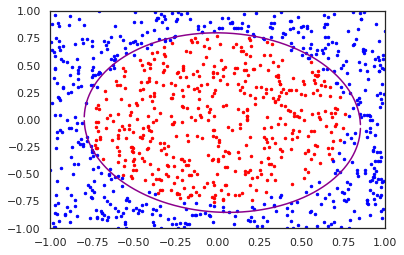

In [22]:
#----------> Using the hypothesis from problem 9
w_10 = np.array([[-1],
             [-0.05],
             [0.08],
             [0.13],
             [1.50],
             [1.50]])
runs_10 = 1
E_out_10 = []

for _ in range(0, runs_10):
  x_10 = np.concatenate((x0_nt , np.random.uniform(-1, 1, (N_nt, d))), 1)
  y_10 = target_function_nt(x_10)
  g_10 = hypothesis(w_10, nonlinear_transform(x_10))
  compare_10 = g_10*y_10
  miss_10 = np.count_nonzero(compare_10 == -1)
  E_out_10.append(miss_10/N_nt)


print('(10) Average Out-of-Sample Error: ', np.average(E_out_10))

xplot_np = np.linspace(-1, 1, 10000)
bound_up, bound_down = nonlinear_boundary(w_10, xplot_np)
plt.figure()
plt.plot(xplot_np, bound_up, color='darkmagenta')
plt.plot(xplot_np, bound_down, color='darkmagenta')

points = np.concatenate((x_10, y_10), 1)
for ind in range(0, np.size(x_10,0)):
  if points[ind,-1] == 1.0:
    plt.scatter(points[ind,1], points[ind,2], color='blue', s=6)
  else:
    plt.scatter(points[ind,1], points[ind,2], color='red', s=6)

plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()